In [27]:
import pandas as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
df = np.read_csv("./train.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
# حذف ستون های Unnamed و id

df = df.drop(columns=['Unnamed: 0', 'id'])
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
# بررسی ستون های categorical
df.select_dtypes(include='object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [6]:
# تبدیل ستون های categorical به عدد

# Target
df['satisfaction'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

# Binary categorical
df['Gender'] = df['Gender'].map({
    'Male': 1,
    'Female': 0
})

df['Customer Type'] = df['Customer Type'].map({
    'Loyal Customer': 1,
    'disloyal Customer': 0
})

df['Type of Travel'] = df['Type of Travel'].map({
    'Business travel': 1,
    'Personal Travel': 0
})

# Ordinal categorical
df['Class'] = df['Class'].map({
    'Business': 2,
    'Eco Plus': 1,
    'Eco': 0
})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
# رفع مشکل missing value
# از Median استفاده کردم تا تاثیر outliers ها حداقل بشه

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(
    df['Arrival Delay in Minutes'].median()
)

In [9]:
df['Arrival Delay in Minutes'].describe()

count    103904.000000
mean         15.133392
std          38.649776
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [11]:
df['satisfaction'].value_counts()
df['satisfaction'].value_counts(normalize=True)

satisfaction
0    0.566667
1    0.433333
Name: proportion, dtype: float64

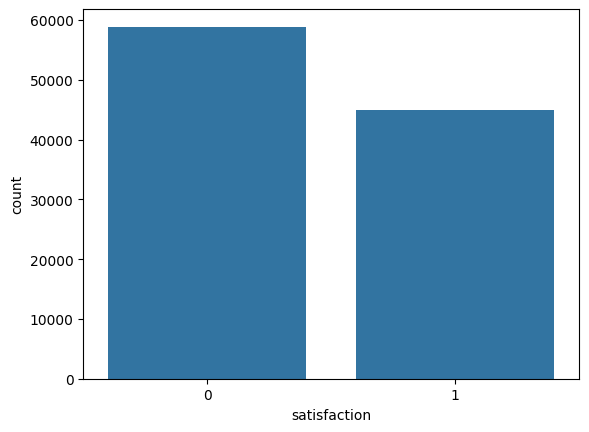

In [12]:
sns.countplot(x='satisfaction', data=df)
plt.show()

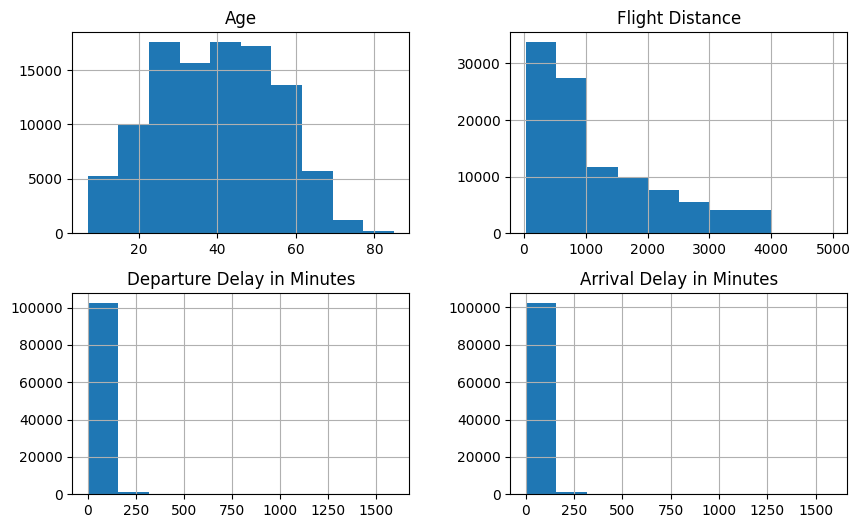

In [13]:
df[['Age','Flight Distance','Departure Delay in Minutes',
    'Arrival Delay in Minutes']].hist(figsize=(10,6))
plt.show()

In [21]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.817322,39.379706,0.689627,1.028103,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.962858,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,40.000000,1.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [22]:
X = df.drop('satisfaction', axis=1)
Y = df['satisfaction']

In [24]:
num_cols = [
    'Age',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

In [25]:
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols)
    ],
    remainder='passthrough'
)

In [26]:
X_scaled = preprocessor.fit_transform(X)

In [28]:
scaled_columns = (
    num_cols +
    [c for c in X.columns if c not in num_cols]
)

X_train_scaled = pd.DataFrame(
    X_scaled,
    columns=scaled_columns
)

In [29]:
X_train_scaled

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,-1.745279,-0.731539,0.266393,0.074169,1.0,1.0,0.0,1.0,3.0,4.0,...,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0
1,-0.951360,-0.957184,-0.361375,-0.236313,1.0,0.0,1.0,2.0,3.0,2.0,...,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0
2,-0.885200,-0.047584,-0.387532,-0.391554,0.0,1.0,1.0,2.0,2.0,2.0,...,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0
3,-0.951360,-0.629246,-0.099805,-0.158692,0.0,1.0,1.0,2.0,2.0,5.0,...,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0
4,1.430397,-0.978244,-0.387532,-0.391554,1.0,1.0,1.0,2.0,3.0,3.0,...,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.083680,-1.000307,-0.309061,-0.391554,0.0,0.0,1.0,0.0,2.0,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0
103900,0.636478,1.160869,-0.387532,-0.391554,1.0,1.0,1.0,2.0,4.0,4.0,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
103901,-0.620561,0.807860,-0.204433,-0.029325,1.0,0.0,1.0,2.0,1.0,1.0,...,4.0,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0
103902,-1.149840,-0.189991,-0.387532,-0.391554,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,4.0,5.0,1.0,5.0,4.0,1.0


In [30]:
X_train_scaled[num_cols].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-8.753221e-18,8.042022e-17,-3.460258e-17,-2.325074e-18
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.142239e+00,-1.161768e+00,-3.875318e-01,-3.915538e-01
25%,-8.190404e-01,-7.776706e-01,-3.875318e-01,-3.915538e-01
50%,4.103858e-02,-3.474412e-01,-3.875318e-01,-3.915538e-01
75%,7.687977e-01,5.551379e-01,-7.364806e-02,-5.519832e-02
max,3.018235e+00,3.804423e+00,4.125438e+01,4.059206e+01


In [32]:
type(Y)

pandas.core.series.Series

In [ ]:
# Forward Selection

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=1000)

sfs_forward = SequentialFeatureSelector(
    base_model,
    n_features_to_select=10,
    direction='forward',
    scoring='f1',
    cv=5
)

sfs_forward.fit(X_train_scaled, Y)

forward_features = X_train_scaled.columns[sfs_forward.get_support()]
forward_features

Index(['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Online boarding',
       'Inflight entertainment', 'On-board service', 'Baggage handling',
       'Checkin service'],
      dtype='object')

In [34]:
# Backward Elimination

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=1000)

sfs_backward = SequentialFeatureSelector(
    estimator=base_model,
    n_features_to_select=10,
    direction='backward',
    scoring='f1',
    cv=5,
    n_jobs=-1
)

sfs_backward.fit(X_train_scaled, Y)

backward_features = X_train_scaled.columns[
    sfs_backward.get_support()
]

backward_features

Index(['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Online boarding',
       'On-board service', 'Leg room service', 'Checkin service',
       'Cleanliness'],
      dtype='object')

In [ ]:
# PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('satisfaction', axis=1)
Y = df['satisfaction']

# استانداردسازی داده‌ها (PCA به داده‌های scale شده حساس است)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# اجرای PCA
pca = PCA(n_components=0.95)  # حفظ 95٪ واریانس
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X.shape[1])
print("Number of principal components after PCA:", X_pca.shape[1])
